In [1]:
# This necessary library used in data science 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings   # to avoid the warnings during executing the program
warnings.filterwarnings('ignore')

In [2]:
# to load the dataset
df = pd.read_csv("mall.csv")
df

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
...,...,...
298,241,123
299,264,132
300,193,141
301,131,115


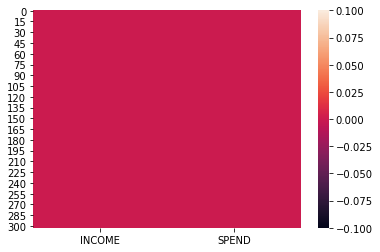

In [3]:
# check the null values
sns.heatmap(df.isnull())
plt.show()

In [4]:
# check the datatypes
df.dtypes

INCOME    int64
SPEND     int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   INCOME  303 non-null    int64
 1   SPEND   303 non-null    int64
dtypes: int64(2)
memory usage: 4.9 KB


In [6]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler

In [7]:
X=df.columns
print(X)
for col in X:
    # Create the object of StandardScaler() class
    ss = StandardScaler()
    df[col]=ss.fit_transform(df[[col]])

Index(['INCOME', 'SPEND'], dtype='object')


In [8]:
# Check the scaling on dataset
df.head()

,INCOME,SPEND
0,-0.253492,0.015443
1,0.097607,1.633471
2,-0.852427,0.977514
3,-0.191534,1.239897
4,2.245510,0.583939


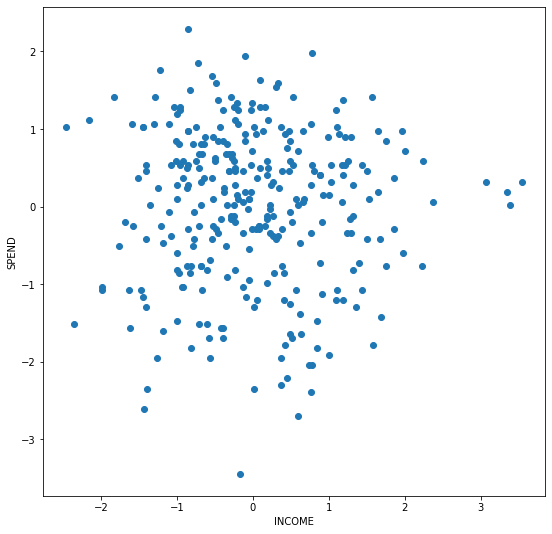

In [9]:
# Visualize the dataset 
# Using the scatterplot
X = df["INCOME"]
Y = df['SPEND']
plt.figure(figsize=(9,9))
plt.scatter(X,Y)
plt.xlabel("INCOME")
plt.ylabel("SPEND")
plt.show()

In [10]:
# How many cluster k in the dataset
# Call the KMEANS inbuilt call 
from sklearn.cluster import KMeans     # KMeans inbuilt class

In [11]:
# Elbow Method :- Use how many cluster k in the dataset
k_rng = range(1,21)  # start = 1 and stop = 20
# Declare the empty list for SSE (Sum of Squared error)
SSE=[]
# Declare the empty list for K
k_cluster = []
for k in k_rng:
    # create the object of KMeans class
    km=KMeans(n_clusters=k)  #first time k=1, second time k=2 , so on ....
    # train the model use fit() method
    km.fit(df[["INCOME","SPEND"]])
    # Interia_ inbuilt method of KMeans class with calculate the sum of squared error
    # formula of SSE= sum(centerpoint-datapoint)^2
    SSE.append(km.inertia_)
    k_cluster.append(k)

In [12]:
print("Sum of Squared Error :", SSE)
print("Value of Cluster k :", k_cluster)

Sum of Squared Error : [605.9999999999998, 401.22497812124897, 253.54834006260026, 199.39129803530653, 155.7864181702021, 131.20111252935135, 115.18299791162653, 101.96309545190014, 90.50457865915682, 81.26075112190082, 71.79883810345312, 66.41831938857719, 62.04047256116492, 56.7513500067883, 52.69756256497953, 48.44434511785922, 45.49881985575889, 42.70685931021642, 41.095976311062934, 37.94091370332851]
Value of Cluster k : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


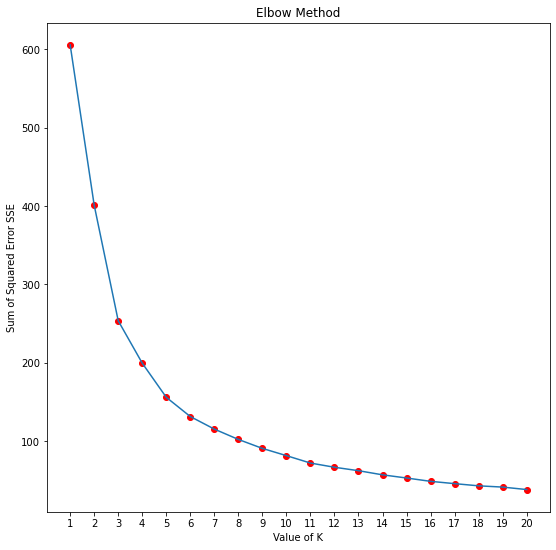

In [13]:
# Visualize SSE and Value of K 
plt.figure(figsize=(9,9))
plt.scatter(k_cluster,SSE,color="red")
plt.plot(k_cluster,SSE)
plt.xticks(k_cluster)
plt.xlabel("Value of K")
plt.ylabel("Sum of Squared Error SSE")
plt.title("Elbow Method")
plt.show()

In [14]:
# Clear no. of cluster = 5 to see above visualization in this dataset.

In [15]:
km=KMeans(n_clusters=5,random_state=1) # passing the values of k means no. of cluster

In [16]:
Y_pred=km.fit_predict(df[["INCOME","SPEND"]]) # Both training and testing will be done with help 
# of distance method. because here is not any label data.

In [17]:
print(Y_pred)

[0 3 3 3 4 1 4 0 3 3 0 0 0 1 0 3 4 1 3 0 0 3 3 0 3 4 3 1 4 3 3 1 3 0 1 3 4
 3 0 4 4 3 0 0 4 4 3 0 1 0 0 4 0 3 3 3 3 3 3 4 2 4 3 1 3 3 0 3 3 3 0 0 3 3
 3 0 0 3 3 0 3 4 4 4 2 0 0 3 3 2 3 3 3 4 1 1 4 0 4 3 3 0 3 3 3 1 1 0 0 0 4
 3 2 3 0 3 3 3 3 0 2 3 0 0 3 3 1 0 3 2 3 0 4 0 4 0 1 1 1 2 4 4 3 0 1 0 0 3
 3 1 0 1 0 0 0 1 3 3 0 3 3 4 3 3 3 2 1 0 0 3 0 3 4 3 1 1 0 4 1 2 4 1 4 3 2
 4 0 2 3 3 4 1 1 0 3 4 0 0 2 0 3 0 2 0 1 0 0 0 1 3 0 0 1 4 0 4 2 4 2 0 4 1
 4 2 1 1 2 1 4 2 0 2 0 2 2 4 4 4 4 0 2 0 1 2 1 0 4 2 3 0 2 0 2 2 2 4 2 1 0
 3 3 0 2 0 1 1 2 1 2 2 0 0 2 0 2 3 1 0 4 1 2 3 1 3 1 2 3 3 4 1 3 4 0 0 1 1
 1 1 2 2 1 1 3]


In [18]:
# add new columns after fir_predict in dataset df 
# df["new_column"] = new values
df["cluster"] = Y_pred
df.head(10)

,INCOME,SPEND,cluster
0,-0.253492,0.015443,0
1,0.097607,1.633471,3
2,-0.852427,0.977514,3
3,-0.191534,1.239897,3
4,2.245510,0.583939,4
5,-1.100262,-0.072018,1
6,1.006335,0.146634,4
7,0.366095,1.021244,0
8,-0.955692,0.540209,3
9,-1.595932,1.064975,3


In [19]:
# Create 5 DataFrame according to cluster
df0=df[df["cluster"]==0]
df1=df[df["cluster"]==1]
df2=df[df["cluster"]==2]
df3=df[df["cluster"]==3]
df4=df[df["cluster"]==4]

In [20]:
df0

,INCOME,SPEND,cluster
0,-0.253492,0.015443,0
7,0.366095,1.021244,0
10,-0.129575,0.452748,0
11,0.613930,-0.465593,0
12,0.428054,0.933783,0
...,...,...,...
271,-0.232839,-0.203210,0
273,-0.232839,0.277826,0
277,0.324789,-0.378132,0
292,-0.418716,-0.159479,0


In [21]:
df1

,INCOME,SPEND,cluster
5,-1.100262,-0.072018,1
13,-0.707857,-0.246940,1
17,-0.398063,-1.558855,1
27,-1.451362,-1.165281,1
31,-1.410056,-0.421862,1
34,-0.666551,-1.077820,1
48,-0.604592,-1.515125,1
63,-0.873080,-0.771706,1
94,-1.761155,-0.509323,1
95,-0.398063,-1.690047,1


In [22]:
df2

,INCOME,SPEND,cluster
60,0.407401,-0.859167,2
84,0.407401,-1.209011,2
89,0.056301,-1.209011,2
112,1.398741,-0.727976,2
120,1.192212,-1.209011,2
129,0.490013,-1.252742,2
139,0.366095,-1.952430,2
165,0.841112,-1.821238,2
179,0.634583,-1.646316,2
184,-0.046963,-0.946628,2


In [23]:
# Find the centroid value of each cluster, use inbuilt method cluster_centers_
# Which id define in KMeans class
km.cluster_centers_

array([[ 0.10070512,  0.120396  ],
       [-1.01805523, -1.00236328],
       [ 0.66370889, -1.50951841],
       [-0.64637809,  0.96937799],
       [ 1.56528247,  0.36156508]])

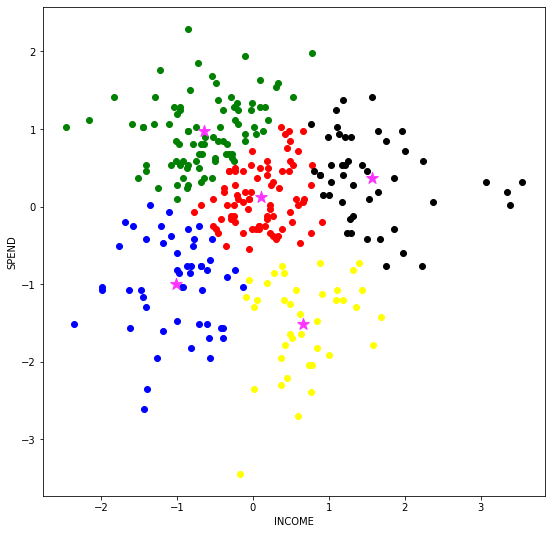

In [31]:
# Visualize using scatterplot
plt.figure(figsize=(9,9))
plt.scatter(df0["INCOME"],df0["SPEND"],color="red")
plt.scatter(df1["INCOME"],df1["SPEND"],color="blue")
plt.scatter(df2["INCOME"],df2["SPEND"],color="yellow")
plt.scatter(df3["INCOME"],df3["SPEND"],color="green")
plt.scatter(df4["INCOME"],df4["SPEND"],color="black")
# Show centroid of cluster in plot 
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="#FD33FF",marker="*",s=150)
plt.xlabel("INCOME")
plt.ylabel("SPEND")
plt.show()